<img src="https://github.com/djp840/MSDS_458_Public/blob/master/images/NorthwesternHeader.png?raw=1">

## MSDS422 Assignment 04

<div class="alert alert-block alert-success">
    <b>More Technical</b>: Throughout the notebook. This types of boxes provide more technical details and extra references about what you are seeing. They contain helpful tips, but you can safely skip them the first time you run through the code.
</div>

### Data Dictionary Titanic Dataset


<br>
   
| Variable        | Description                        |  Details                  |  
| :---            |    :----:                          |     :----:                |   
| Survival        | Survival                           | 0 = No; 1 = Yes           |    
| pclass          | Passenger Class                    | 1 = 1st; 2 = 2nd; 3 = 3rd |     
| name            | First and Last Name                |                           |
| sex             | Sex                                |                           |	 
| age             | Age                                |                           | 	 
| sibsp 	  | Number of Siblings/Spouses Aboard  |                           | 	 
| parch           | Number of Parents/Children Aboard  |                           |
| ticket 	  | Ticket Number 	               |                           |
| fare 	          | Passenger Fare 	               |                           |
| cabin 	  | Cabin 	                       |                           | 
| embarked 	  | Port of Embarkation 	       |C = Cherbourg; Q = Queenstown; S = Southampton |
    

## Import packages 



In [1]:
import numpy as np 
import pandas as pd 
from math import sqrt

import statsmodels.formula.api as sm
from xgboost import XGBClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier # Random Forest package
from sklearn.ensemble import ExtraTreesClassifier # Extra Trees package

from sklearn.metrics import mean_squared_error, r2_score ,make_scorer, accuracy_score, roc_auc_score, roc_curve 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

import scikitplot as skplt
import seaborn as sns
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set(style="whitegrid", color_codes=True)
plt.rc("font", size=14)
np.random.seed(42)

In [2]:
%matplotlib inline

In [3]:
np.set_printoptions(precision=4)

<div class="alert alert-block alert-info">
    <b>Suppress warning messages</b></div>

In [4]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

### Mount Google Drive to Colab Enviorment

In [5]:
#from google.colab import drive
#drive.mount('/content/gdrive')

### Load Data (Local Directory)

In [6]:
training_df = pd.read_csv("./data/MSDS422_train.csv")
test_df = pd.read_csv("./data/MSDS422_test.csv")

### Data Quality Review 

In [7]:
print("Shape:", training_df.shape,"\n")
print("Variable Types:") 
print(training_df.dtypes)

Shape: (891, 12) 

Variable Types:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [8]:
print("Shape:", test_df.shape,"\n")
print("Variable Types:") 
print(test_df.dtypes)

Shape: (418, 11) 

Variable Types:
PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [9]:
training_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploritory Data Analysis (EDA) 

### Review Training and Test Dataset for Missing Values

In [10]:
training_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<div class="alert alert-block alert-warning">
Attention to the <b>count</b> row for each column number of records
</div> 

In [12]:
training_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


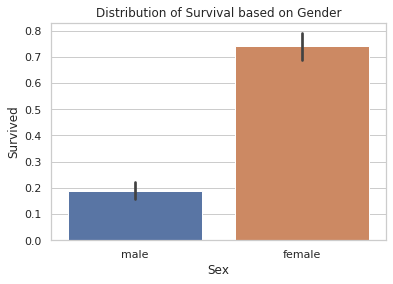

Total people survived is: 342
Proportion of Females who survived:
0.6812865497076024
Proportion of Males who survived:
0.31871345029239767


In [13]:
sns.barplot(x="Sex", y="Survived", data=training_df)
plt.title("Distribution of Survival based on Gender")
plt.show()

total_survived_females = training_df[training_df.Sex == "female"]["Survived"].sum()
total_survived_males = training_df[training_df.Sex == "male"]["Survived"].sum()

print("Total people survived is: " + str((total_survived_females + total_survived_males)))
print("Proportion of Females who survived:") 
print(total_survived_females/(total_survived_females + total_survived_males))
print("Proportion of Males who survived:")
print(total_survived_males/(total_survived_females + total_survived_males))

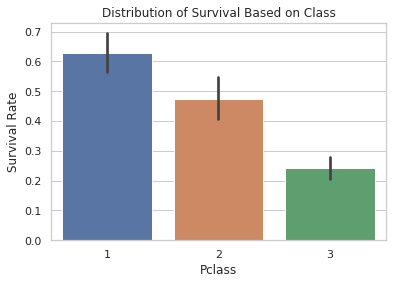

Total people survived is: 342
Proportion of Class 1 Passengers who survived:
0.39766081871345027
Proportion of Class 2 Passengers who survived:
0.2543859649122807
Proportion of Class 3 Passengers who survived:
0.347953216374269


In [14]:
sns.barplot(x="Pclass", y="Survived", data=training_df)
plt.ylabel("Survival Rate")
plt.title("Distribution of Survival Based on Class")
plt.show()

total_survived_one = training_df[training_df.Pclass == 1]["Survived"].sum()
total_survived_two = training_df[training_df.Pclass == 2]["Survived"].sum()
total_survived_three = training_df[training_df.Pclass == 3]["Survived"].sum()
total_survived_class = total_survived_one + total_survived_two + total_survived_three

print("Total people survived is: " + str(total_survived_class))
print("Proportion of Class 1 Passengers who survived:") 
print(total_survived_one/total_survived_class)
print("Proportion of Class 2 Passengers who survived:")
print(total_survived_two/total_survived_class)
print("Proportion of Class 3 Passengers who survived:")
print(total_survived_three/total_survived_class)

Text(0.5, 1.0, 'Survival Rates Based on Gender and Class')

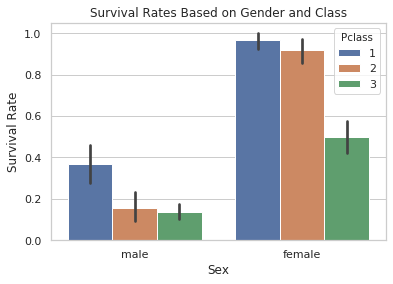

In [15]:
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=training_df)
plt.ylabel("Survival Rate")
plt.title("Survival Rates Based on Gender and Class")

### Correlation Heatmap

<div class="alert alert-block alert-info">
<b>Seaborn Heatmap Documentation</b><br>
https://seaborn.pydata.org/generated/seaborn.heatmap.html
</div>

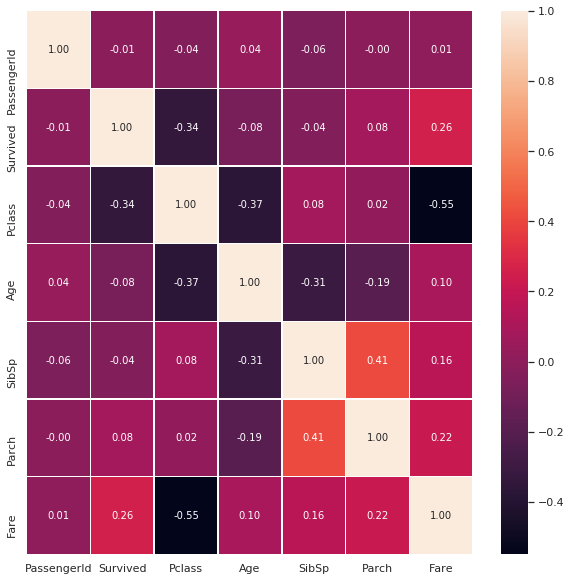

In [16]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(training_df.corr(), annot=True, linewidths=0.5, fmt= '.2f',ax=ax)

## Preprocess Data for Analysis

### Fix Missing Values, Feature  Engineering

#### Encode Gender Male = 1, Female = 0

In [17]:
sex_map={"male":1,"female":0}
training_df["Sex"]=training_df["Sex"].map(sex_map)
test_df["Sex"]=test_df["Sex"].map(sex_map)

In [18]:
training_df["Sex"].head()

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int64

Passenger Class<b> (Pclass)</b> and Number of Siblings<b> (SibSp)</b> provide insights into the social-economic status differences. The <b>Age</b> of the passenger will be imputed by median age of each sub-group

### Training Dataset

In [19]:
training_df1=training_df.groupby(["Pclass","SibSp"])
training_df1_median=training_df1.median()
training_df1_median

PassengerId  Survived  Sex   Age  Parch      Fare
Pclass SibSp                                                   
1      0            476.0       1.0  1.0  37.0    0.0   39.6000
       1            485.0       1.0  0.0  38.0    0.0   79.2000
       2            572.0       1.0  0.0  44.0    0.0  133.6500
       3             89.0       1.0  0.0  23.0    2.0  263.0000
2      0            407.0       0.0  1.0  30.0    0.0   13.0000
       1            451.0       1.0  0.0  29.0    1.0   26.0000
       2            565.5       0.5  1.0  23.5    1.0   39.0000
       3            727.0       1.0  0.0  30.0    0.0   21.0000
3      0            472.0       0.0  1.0  26.0    0.0    7.8958
       1            372.0       0.0  1.0  25.0    0.0   15.5500
       2            334.0       0.0  1.0  19.5    0.0   19.2583
       3            302.5       0.0  0.0   6.0    1.0   25.4667
       4            264.5       0.0  1.0   6.5    1.5   31.2750
       5            387.0       0.0  1.0  11.0    2.0   46.9000
       8            325.0       0.0  1.0   NaN    2.0   69.5500

### Test Dataset

In [20]:
test_df1=test_df.groupby(["Pclass","SibSp"])
test_df1_median=test_df1.median()
test_df1_median

PassengerId  Sex   Age  Parch       Fare
Pclass SibSp                                          
1      0           1088.0  1.0  39.0    0.0   42.50000
       1           1109.5  0.5  46.0    0.0   82.06250
       2            969.0  0.0  55.0    0.0   51.47920
       3            945.0  0.0  28.0    2.0  263.00000
2      0           1117.5  1.0  27.0    0.0   13.00000
       1           1139.0  1.0  29.0    0.0   26.00000
       2           1077.5  0.5  21.0    0.5   31.50000
3      0           1095.5  1.0  24.0    0.0    7.82920
       1           1084.0  0.0  20.0    1.0   15.24580
       2           1059.0  1.0  19.5    0.0   21.67920
       3           1281.0  1.0  29.0    1.0   21.07500
       4           1076.0  1.0  11.5    2.0   30.25625
       5           1032.0  0.0  10.0    2.0   46.90000
       8           1166.0  0.5  14.5    2.0   69.55000

### Function - Impute Age

In [21]:
def impute_age(dataset,dataset_med):
    for x in range(len(dataset)):
        if dataset["Pclass"][x]==1:
            if dataset["SibSp"][x]==0:
                return dataset_med.loc[1,0]["Age"]
            elif dataset["SibSp"][x]==1:
                return dataset_med.loc[1,1]["Age"]
            elif dataset["SibSp"][x]==2:
                return dataset_med.loc[1,2]["Age"]
            elif dataset["SibSp"][x]==3:
                return dataset_med.loc[1,3]["Age"]
        elif dataset["Pclass"][x]==2:
            if dataset["SibSp"][x]==0:
                return dataset_med.loc[2,0]["Age"]
            elif dataset["SibSp"][x]==1:
                return dataset_med.loc[2,1]["Age"]
            elif dataset["SibSp"][x]==2:
                return dataset_med.loc[2,2]["Age"]
            elif dataset["SibSp"][x]==3:
                return dataset_med.loc[2,3]["Age"]
        elif dataset["Pclass"][x]==3:
            if dataset["SibSp"][x]==0:
                return dataset_med.loc[3,0]["Age"]
            elif dataset["SibSp"][x]==1:
                return dataset_med.loc[3,1]["Age"]
            elif dataset["SibSp"][x]==2:
                return dataset_med.loc[3,2]["Age"]
            elif dataset["SibSp"][x]==3:
                return dataset_med.loc[3,3]["Age"]
            elif dataset["SibSp"][x]==4:
                return dataset_med.loc[3,4]["Age"]
            elif dataset["SibSp"][x]==5:
                return dataset_med.loc[3,5]["Age"]
            elif dataset["SibSp"][x]==8:
                return dataset_med.loc[3]["Age"].median() 

In [22]:
training_df["Age"]=training_df["Age"].fillna(impute_age(training_df,training_df1_median))
test_df["Age"]=test_df["Age"].fillna(impute_age(test_df,test_df1_median))

In [23]:
print(training_df.isnull().sum()), print(test_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


(None, None)

### Fix Missing Values Cabin

Missing Values will be filled by "U" = Unknown

In [24]:
training_df["Cabin"]=training_df["Cabin"].fillna("U")
test_df["Cabin"]=test_df["Cabin"].fillna("U")
training_df["Cabin"]=training_df["Cabin"].map(lambda x: x[0])
test_df["Cabin"]=test_df["Cabin"].map(lambda x: x[0])

In [25]:
training_df["Cabin"].head()

0    U
1    C
2    U
3    C
4    U
Name: Cabin, dtype: object

In [26]:
training_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,U,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,U,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,U,S


In [27]:
training_df.shape

(891, 12)

In [28]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [29]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        418 non-null    object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 36.0+ KB


### Function - Cabin Assignment 
If passenger assigned to cabin "1" and "0" if passenger is not assigned

In [30]:
def cabin_assignment(dataset):
    dataset["Cabin A"]=np.where(dataset["Cabin"]=="A",1,0)
    dataset["Cabin B"]=np.where(dataset["Cabin"]=="B",1,0)
    dataset["Cabin C"]=np.where(dataset["Cabin"]=="C",1,0)
    dataset["Cabin D"]=np.where(dataset["Cabin"]=="D",1,0)
    dataset["Cabin E"]=np.where(dataset["Cabin"]=="E",1,0)
    dataset["Cabin F"]=np.where(dataset["Cabin"]=="F",1,0)
    dataset["Cabin G"]=np.where(dataset["Cabin"]=="G",1,0)
    dataset["Cabin T"]=np.where(dataset["Cabin"]=="T",1,0) 

In [31]:
cabin_assignment(training_df)
cabin_assignment(test_df)

In [32]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
 12  Cabin A      891 non-null    int64  
 13  Cabin B      891 non-null    int64  
 14  Cabin C      891 non-null    int64  
 15  Cabin D      891 non-null    int64  
 16  Cabin E      891 non-null    int64  
 17  Cabin F      891 non-null    int64  
 18  Cabin G      891 non-null    int64  
 19  Cabin T 

In [33]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        418 non-null    object 
 10  Embarked     418 non-null    object 
 11  Cabin A      418 non-null    int64  
 12  Cabin B      418 non-null    int64  
 13  Cabin C      418 non-null    int64  
 14  Cabin D      418 non-null    int64  
 15  Cabin E      418 non-null    int64  
 16  Cabin F      418 non-null    int64  
 17  Cabin G      418 non-null    int64  
 18  Cabin T      418 non-null    int64  
dtypes: float

### Fix Missing Values Embarked

Embarked has 2 missing values in training dataset

In [34]:
training_df["Embarked"]=training_df["Embarked"].fillna("S")

In [35]:
training_df["Embarked"].isnull().sum()

0

### Function - Embarked Location 
If passenger embarked from location assigned "1" and "0" if passenger is did not embark from location 

In [36]:
def embark_assignment(dataset):
    dataset["Embarked S"]=np.where(dataset["Embarked"]=="S",1,0)
    dataset["Embarked C"]=np.where(dataset["Embarked"]=="C",1,0) 

NOTE: Embarked on Q is when the rest of embarked are 0

In [37]:
embark_assignment(training_df)
embark_assignment(test_df)

### Fix Missing Values Fare

In [38]:
test_df["Fare"]=test_df["Fare"].fillna(np.mean(test_df["Fare"]))

In [39]:
test_df["Fare"].isnull().sum()

0

### Feature Engineering - Family Size

<b>Family Size</b> = (SibSp and Parch)<br>
Total number of family members on board for each passenger

| Variable        | Description                        |  
| :---            |    :----:                          |
| sibsp 	      | Number of Siblings/Spouses Aboard  | 	 
| parch           | Number of Parents/Children Aboard  |

In [40]:
training_df["FamilySize"] = training_df["SibSp"] + training_df["Parch"] + 1
test_df["FamilySize"] = test_df["SibSp"] + test_df["Parch"] + 1

In [41]:
training_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Cabin B,Cabin C,Cabin D,Cabin E,Cabin F,Cabin G,Cabin T,Embarked S,Embarked C,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,...,0,0,0,0,0,0,0,1,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,...,0,1,0,0,0,0,0,0,1,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,0,0,0,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,...,0,1,0,0,0,0,0,1,0,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,...,0,0,0,0,0,0,0,1,0,1


In [42]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
 12  Cabin A      891 non-null    int64  
 13  Cabin B      891 non-null    int64  
 14  Cabin C      891 non-null    int64  
 15  Cabin D      891 non-null    int64  
 16  Cabin E      891 non-null    int64  
 17  Cabin F      891 non-null    int64  
 18  Cabin G      891 non-null    int64  
 19  Cabin T 

### Drop Columns from Preprocessing 

In [43]:
training_df.drop(["Name","Ticket","PassengerId","Embarked","Cabin","SibSp","Parch"],inplace=True,axis=1)
test_df.drop(["Name","Ticket","Embarked","Cabin","SibSp","Parch"],inplace=True,axis=1)

In [44]:
training_df.tail()

,Survived,Pclass,Sex,Age,Fare,Cabin A,Cabin B,Cabin C,Cabin D,Cabin E,Cabin F,Cabin G,Cabin T,Embarked S,Embarked C,FamilySize
886,0,2,1,27.0,13.00,0,0,0,0,0,0,0,0,1,0,1
887,1,1,0,19.0,30.00,0,1,0,0,0,0,0,0,1,0,1
888,0,3,0,25.0,23.45,0,0,0,0,0,0,0,0,1,0,4
889,1,1,1,26.0,30.00,0,0,1,0,0,0,0,0,0,1,1
890,0,3,1,32.0,7.75,0,0,0,0,0,0,0,0,0,0,1


## Model Development 

The Label = Survived, we removed the label from Training and Test Datasets

In [45]:
training_df1=training_df.copy()
test_df1=test_df.copy()

### Create Features and Label

In [46]:
x=training_df1.drop(["Survived"],axis=1)
y=training_df1["Survived"]

In [47]:
print(x.shape, y.shape)

(891, 15) (891,)


### Split Training Dataset 

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [49]:
print(x_train.shape, x_test.shape)

(712, 15) (179, 15)


In [50]:
x_train.head()

,Pclass,Sex,Age,Fare,Cabin A,Cabin B,Cabin C,Cabin D,Cabin E,Cabin F,Cabin G,Cabin T,Embarked S,Embarked C,FamilySize
140,3,0,25.0,15.2458,0,0,0,0,0,0,0,0,0,1,3
439,2,1,31.0,10.5000,0,0,0,0,0,0,0,0,1,0,1
817,2,1,31.0,37.0042,0,0,0,0,0,0,0,0,0,1,3
378,3,1,20.0,4.0125,0,0,0,0,0,0,0,0,0,1,1
491,3,1,21.0,7.2500,0,0,0,0,0,0,0,0,1,0,1


<div class="alert alert-block alert-success">
    <b>K-Folds cross-validator</b>:Provides train/test indices to split data in train/test sets. Split dataset into k consecutive folds (without shuffling by default)<br>
Each fold is then used once as a validation while the k - 1 remaining folds form the training set
</div>

<div class="alert alert-block alert-info">
<b>sklearn.model_selection.KFold</b><br>
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
</div>

In [51]:
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)

### Functions - Support Model Performance Analysis 

In [52]:
def acc_score(model, input_data, output_data):
    return np.mean(cross_val_score(model,input_data,output_data,cv=k_fold,scoring="accuracy"))

In [53]:
def confusion_matrix_model(model_used, input_data, output_data):
    cm=confusion_matrix(output_data,model_used.predict(input_data))
    col=["Predicted Dead","Predicted Survived"]
    cm=pd.DataFrame(cm)
    cm.columns=["Predicted Dead","Predicted Survived"]
    cm.index=["Actual Dead","Actual Survived"]
    cm[col]=np.around(cm[col].div(cm[col].sum(axis=1),axis=0),decimals=2)
    return cm

In [54]:
def importance_of_features(model, input_data):
    features = pd.DataFrame()
    features['feature'] = input_data.columns
    features['importance'] = model.feature_importances_
    features.sort_values(by=['importance'], ascending=True, inplace=True)
    features.set_index('feature', inplace=True)
    return features.plot(kind='barh', figsize=(10,10))

In [55]:
def aucscore(model, input_data, output_data, has_proba=True):
    if has_proba:
        fpr,tpr,thresh=skplt.metrics.roc_curve(output_data,model.predict_proba(input_data)[:,1])
    else:
        fpr,tpr,thresh=skplt.metrics.roc_curve(output_data,model.decision_function(input_data))
    x=fpr
    y=tpr
    auc= skplt.metrics.auc(x,y)
    return auc

In [56]:
def plt_roc_curve(name, model, input_data, output_data, has_proba=True):
    if has_proba:
        fpr,tpr,thresh=skplt.metrics.roc_curve(output_data,model.predict_proba(input_data)[:,1])
    else:
        fpr,tpr,thresh=skplt.metrics.roc_curve(output_data,model.decision_function(input_data))
    x=fpr
    y=tpr
    auc= skplt.metrics.auc(x,y)
    plt.plot(x,y,label='ROC curve for %s (AUC = %0.2f)' % (name, auc))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim((0,1))
    plt.ylim((0,1))
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve (Train Data)")
    plt.legend(loc="lower right")
    plt.show()

### Create Logistic Regression Model

<div class="alert alert-block alert-success">
    <b>Logistic Regression</b>: In the multiclass case, the training algorithm uses the one-vs-rest (OvR) scheme if the ‘multi_class’ option is set to ‘ovr’, and uses the cross-entropy loss if the ‘multi_class’ option is set to ‘multinomial’
</div>

<div class="alert alert-block alert-info">
<b>sklearn.linear_model.LogisticRegression</b><br>
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
</div>

In [57]:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

print("Accuracy: " + str(acc_score(log_reg, x_train, y_train)))
confusion_matrix_model(log_reg, x_train, y_train)

Accuracy: 0.7964050034472571


,Predicted Dead,Predicted Survived
Actual Dead,0.85,0.15
Actual Survived,0.28,0.72


In [58]:
print(log_reg.coef_)

[[-0.7698 -2.5852 -0.0404  0.0035  0.6114  0.2578 -0.0656  0.8338  1.6076
   0.9245 -0.0146 -0.1211 -0.2965 -0.0055 -0.2131]]


In [59]:
print(log_reg.intercept_)

[4.391]


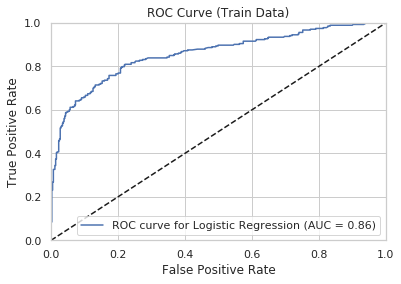

In [60]:
plt_roc_curve("Logistic Regression",log_reg, x_train, y_train, has_proba=True)

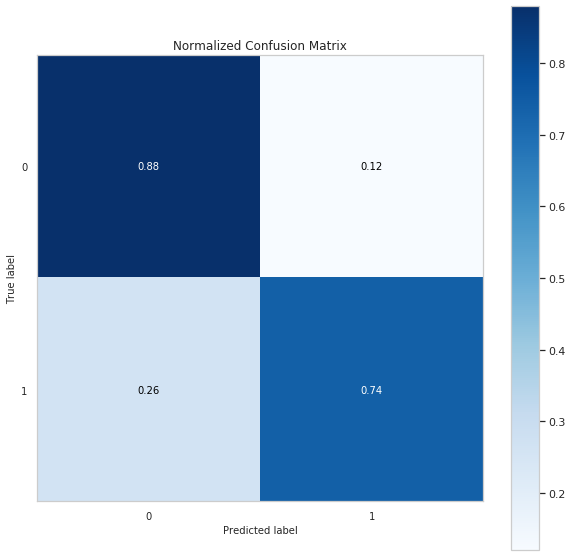

In [61]:
skplt.metrics.plot_confusion_matrix(y_test, log_reg.predict(x_test),normalize=True, figsize=(10,10))

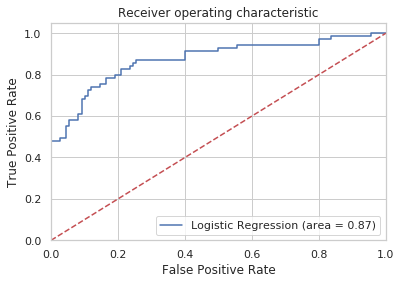

In [62]:
logit_roc_auc = roc_auc_score(y_test, log_reg.predict_proba(x_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Create Random Forest Classifier

<div class="alert alert-block alert-success">
    <b>Random Forest Classifier</b>: is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.
</div>

<div class="alert alert-block alert-info">
<b>sklearn.ensemble.RandomForestClassifier</b><br>
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
</div>

In [63]:
Randreg = RandomForestClassifier()

# Fit data on to the model
Randreg.fit(x_train, y_train)

# Predict
y_predicted_Randreg = Randreg.predict(x_test)

In [64]:
print("Accuracy: " + str(acc_score(Randreg, x_train, y_train)))
confusion_matrix_model(log_reg, x_train, y_train)

Accuracy: 0.797852851373978


,Predicted Dead,Predicted Survived
Actual Dead,0.85,0.15
Actual Survived,0.28,0.72


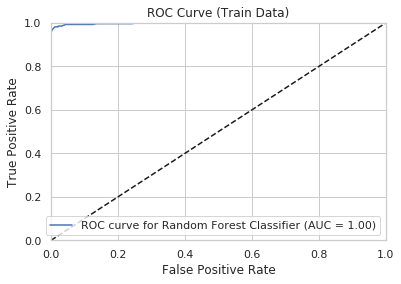

In [65]:
plt_roc_curve("Random Forest Classifier",Randreg, x_train, y_train, has_proba=True)

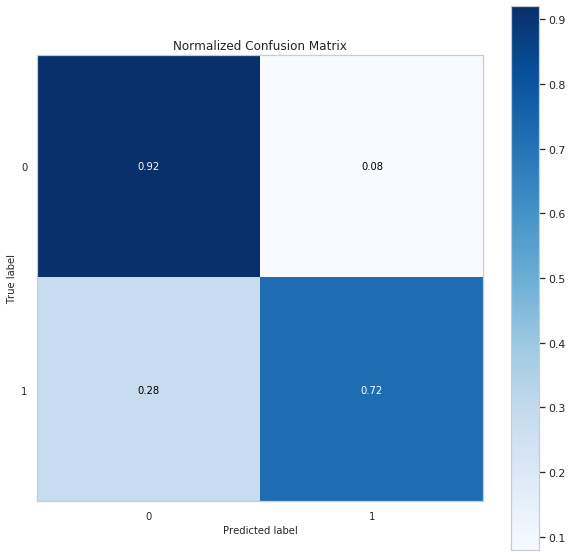

In [66]:
skplt.metrics.plot_confusion_matrix(y_test, Randreg.predict(x_test),normalize=True, figsize=(10,10))

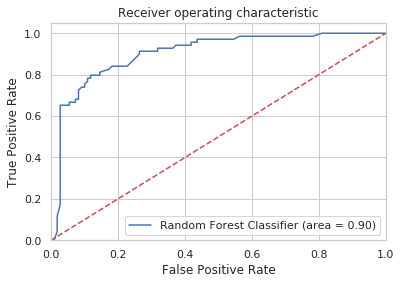

In [67]:
logit_roc_auc = roc_auc_score(y_test, Randreg.predict_proba(x_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, Randreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Create Extra-Trees Classifier

<div class="alert alert-block alert-success">
    <b>Extra-Trees Classifier</b>: This class implements a meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting</div>

<div class="alert alert-block alert-info">
<b>sklearn.ensemble.ExtraTreesClassifier</b><br>
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html
</div>

In [68]:
ETreg = ExtraTreesClassifier()

# Fit data on to the model
ETreg.fit(x_train, y_train)

# Predict
y_predicted_ETreg = ETreg.predict(x_test)

In [69]:
print("Accuracy: " + str(acc_score(ETreg, x_train, y_train)))
ETacc=acc_score(ETreg, x_train, y_train)
confusion_matrix_model(ETreg, x_train, y_train)

Accuracy: 0.7739485866246429


,Predicted Dead,Predicted Survived
Actual Dead,1.00,0.00
Actual Survived,0.04,0.96


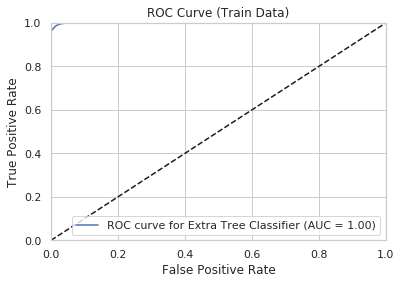

In [70]:
plt_roc_curve("Extra Tree Classifier", ETreg, x_train, y_train, has_proba=True)

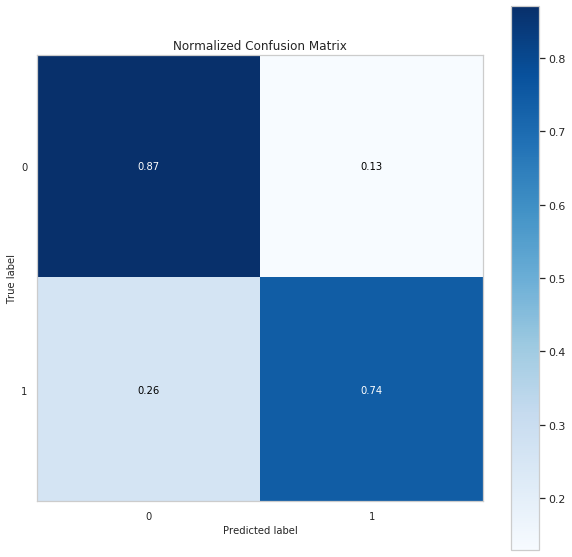

In [71]:
skplt.metrics.plot_confusion_matrix(y_test, ETreg.predict(x_test),normalize=True, figsize=(10,10))

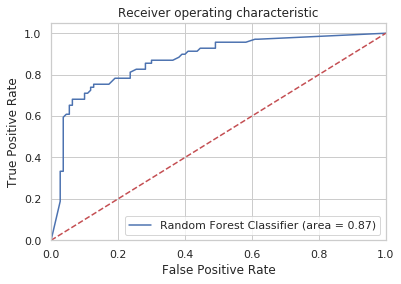

In [72]:
logit_roc_auc = roc_auc_score(y_test, ETreg.predict_proba(x_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, ETreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Training - Summary Statistics - Logistic Regression / Random Forrest Classifier / Extra Trees Classifier

In [73]:
Classifiers=["Logistic Regression","Random Forest Classifier","Extra Trees Classifier"]
Acc=[acc_score(x, x_train, y_train) for x in [log_reg, Randreg, ETreg]]
auc_scores_prob=[aucscore(x, x_train, y_train, has_proba=True) for x in [log_reg,Randreg, ETreg]]
auc_scores=auc_scores_prob[:3] + auc_scores_prob[3:]
cols=["Classifier","Accuracy","AUC"]
results = pd.DataFrame(columns=cols)
results["Classifier"]=Classifiers
results["Accuracy"]=Acc
results["AUC"]=auc_scores
results

,Classifier,Accuracy,AUC
0,Logistic Regression,0.796405,0.857256
1,Random Forest Classifier,0.795056,0.998143
2,Extra Trees Classifier,0.769733,0.999470


### Test - Summary Statistics - Logistic Regression / Random Forrest Classifier / Extra Trees Classifier

In [74]:
Classifiers=["Logistic Regression","Random Forest Classifier","Extra Trees Classifier"]
Acc=[acc_score(x, x_test, y_test) for x in [log_reg,Randreg,ETreg]]
auc_scores_prob=[aucscore(x, x_test, y_test, has_proba=True) for x in [log_reg,Randreg, ETreg]]
auc_scores=auc_scores_prob[:3] + auc_scores_prob[3:]
cols=["Classifier","Accuracy","AUC"]
results = pd.DataFrame(columns=cols)
results["Classifier"]=Classifiers
results["Accuracy"]=Acc
results["AUC"]=auc_scores
results

,Classifier,Accuracy,AUC
0,Logistic Regression,0.776190,0.871937
1,Random Forest Classifier,0.848571,0.903887
2,Extra Trees Classifier,0.832381,0.873320


### HyperParameter Tuning with GridSearchCV

<div class="alert alert-block alert-info">
<b>sklearn.model_selection.GridSearchCV</b><br>
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
</div>

#### HyperParameter Search 

<div class="alert alert-block alert-info">
<b>sklearn.linear_model.LogisticRegression</b><br>
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
</div>

In [75]:
parameters = {"class_weight": ["None", "balanced"], 
              "max_iter": [25,50,75,100],
              "penalty": ["l1", "l2", "elasticnet", "none"], 
              "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
             }

In [76]:
grid_cv = GridSearchCV(log_reg, parameters, scoring = make_scorer(accuracy_score))
grid_cv = grid_cv.fit(x_train, y_train)

In [77]:
print("Our optimized Logistic Regression model is:")
grid_cv.best_estimator_

Our optimized Logistic Regression model is:


LogisticRegression(C=1.0, class_weight='None', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=50,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Build Logistic Regression Model with Parameter Tuning

In [78]:
logreg_clf_GSCV = LogisticRegression(C=1.0, class_weight='None', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=50,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
logreg_clf_GSCV.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight='None', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=50,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [79]:
print("Accuracy: " + str(acc_score(logreg_clf_GSCV,x_train, y_train)))
confusion_matrix_model(logreg_clf_GSCV,x_train, y_train)

Accuracy: 0.7851767950359501


,Predicted Dead,Predicted Survived
Actual Dead,0.87,0.13
Actual Survived,0.30,0.70
